<a href="https://colab.research.google.com/github/remizah/CognoRise_DataScience_Internship/blob/main/CognoRise_DS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:

# Load the dataset
df = pd.read_csv('/content/CarPrice_Assignment.csv')


In [4]:

# Explore the dataset
print(df.head())
print(df.info())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [5]:

# Check for missing values
print(df.isnull().sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:

# Handle missing values if any (for simplicity, we drop rows with missing values)
df.dropna(inplace=True)


In [7]:

# Feature Engineering
# Extract car brand from 'CarName'
df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.drop(['CarName'], axis=1, inplace=True)


In [8]:

# Encode categorical variables
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'carCompany']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [9]:

# Split the data into features and target variable
X = df.drop(['car_ID', 'price'], axis=1)
y = df['price']


In [10]:

# Standardize the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [11]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:

# Make predictions
y_pred = model.predict(X_test)


In [14]:

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 1320.6871666666666
Mean Squared Error: 3482212.096547378
Root Mean Squared Error: 1866.0686205355307
R^2 Score: 0.9558901097544086


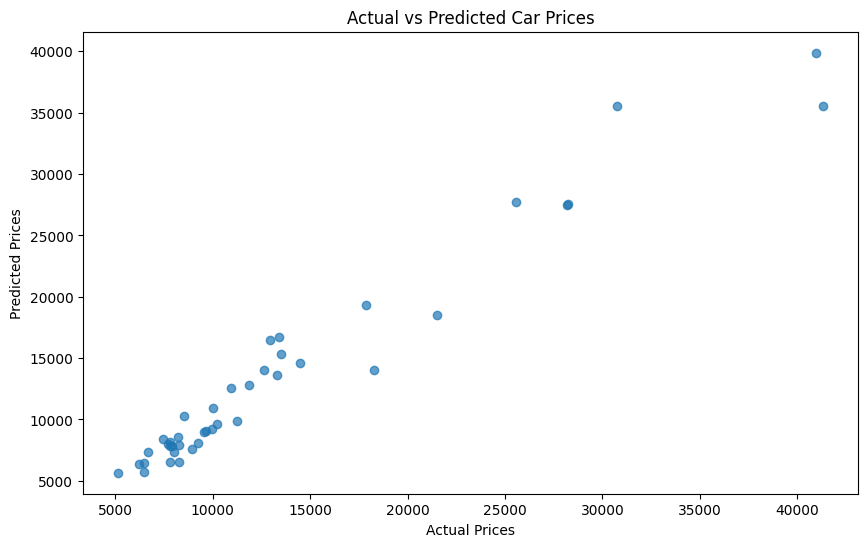

In [15]:

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()


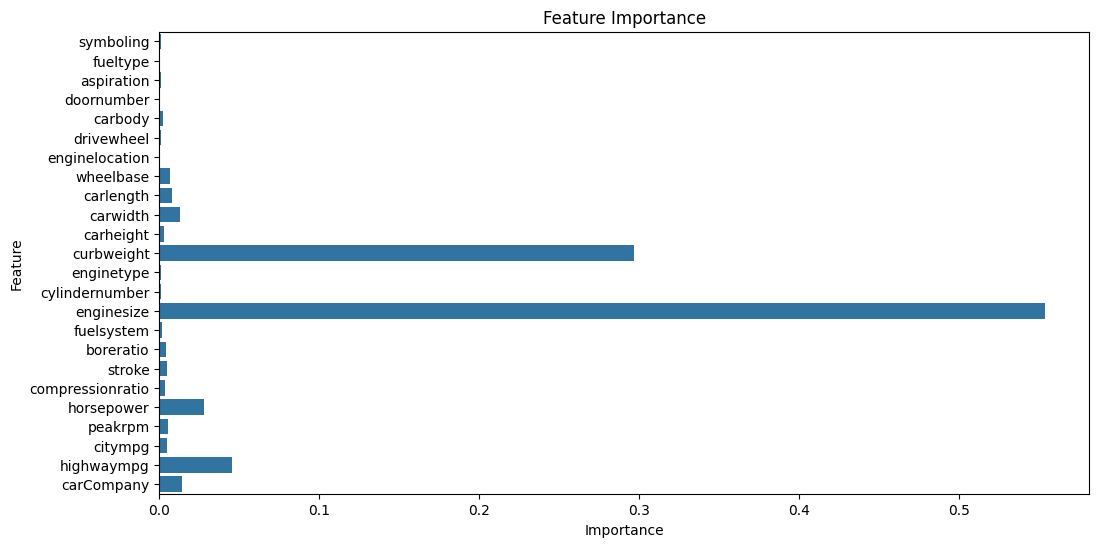

In [16]:

# Feature Importance
importance = model.feature_importances_
features = df.drop(['car_ID', 'price'], axis=1).columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importance, y=features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()